In [20]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble  import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
from xgboost import XGBRFRegressor
from catboost import CatBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [3]:
df = pd.read_csv('data/concrete_compressive_strength.csv')

In [4]:
df.drop_duplicates(inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     1030 non-null   int64  
 1   cement                         1030 non-null   float64
 2   blast_furnace_slag             1030 non-null   float64
 3   fly_ash                        1030 non-null   float64
 4   water                          1030 non-null   float64
 5   superplasticizer               1030 non-null   float64
 6   coarse_aggregate               1030 non-null   float64
 7   fine_aggregate                 1030 non-null   float64
 8   age                            1030 non-null   int64  
 9   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(2)
memory usage: 80.6 KB


In [6]:
df.duplicated().sum()

0

In [9]:
df.drop('Unnamed: 0',axis =1)

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [14]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [15]:
y

0       79.99
1       61.89
2       40.27
3       41.05
4       44.30
        ...  
1025    44.28
1026    31.18
1027    23.70
1028    32.77
1029    32.40
Name: concrete_compressive_strength, Length: 1030, dtype: float64

In [18]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [19]:
y_train.shape

(824,)

In [21]:
def evaluate_model(actual,predicted):
    mae = mean_absolute_error(actual,predicted)
    rmse = np.sqrt(mean_squared_error(actual,predicted))
    r2_square = r2_score(actual,predicted)
    return mae,rmse,r2_square

In [22]:
models = {
    "Linear Regressor":LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "Decision Tree":DecisionTreeRegressor(),
    "Adaboost":AdaBoostRegressor(),
    "KNeighborsRegressor":KNeighborsRegressor(),
    "SVR":SVR(),
    "XGBRFRegressor":XGBRFRegressor(),
    "CatBoostRegressor":CatBoostRegressor(),
    "RandomForestRegressor":RandomForestRegressor()
}

In [31]:

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train,y_train)

    y_pred_test = model.predict(x_test)
    mae,rmse,r2_square = evaluate_model(y_test,y_pred)
    
    model_list.append(list(models.keys())[i])

    print("---------------------------------------------------------------------------")
    print(f"{list(models.keys())[i]}")
    print(f"Mean Absolute Error - {mae}")
    print(f"RMSE - {rmse}")
    print(f"Accuracy : {r2_square}")
    r2_list.append(r2_square)

    print("="*35)
    print('\n')



---------------------------------------------------------------------------
Linear Regressor
Mean Absolute Error - 7.7461659645678145
RMSE - 9.85062243641872
Accuracy : 0.6234246666754881


---------------------------------------------------------------------------
Lasso
Mean Absolute Error - 7.748525372188074
RMSE - 9.85623855253534
Accuracy : 0.6229951519536442


---------------------------------------------------------------------------
Ridge
Mean Absolute Error - 7.746161219618598
RMSE - 9.850621997013345
Accuracy : 0.6234247002711767


---------------------------------------------------------------------------
Decision Tree
Mean Absolute Error - 4.2499029126213586
RMSE - 6.2917265755093705
Accuracy : 0.846374183456425


---------------------------------------------------------------------------
Adaboost
Mean Absolute Error - 6.50855518635401
RMSE - 7.680481226147308
Accuracy : 0.7710706968470498


---------------------------------------------------------------------------
KNeighbo

In [36]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['model','r2_score']).sort_values(by = ['r2_score'],ascending=False)

,model,r2_score
8,CatBoostRegressor,0.949623
9,RandomForestRegressor,0.891900
7,XGBRFRegressor,0.854132
3,Decision Tree,0.846374
4,Adaboost,0.771071
5,KNeighborsRegressor,0.700982
2,Ridge,0.623425
0,Linear Regressor,0.623425
1,Lasso,0.622995
6,SVR,0.267237


In [38]:
cat = CatBoostRegressor()
cat.fit(x_train,y_train)
y_pred1 = cat.predict(x_test)
print(r2_score(y_test,y_pred1))

Learning rate set to 0.03971
0:	learn: 16.4275817	total: 2.24ms	remaining: 2.24s
1:	learn: 16.0413929	total: 4.2ms	remaining: 2.09s
2:	learn: 15.6813422	total: 7.69ms	remaining: 2.56s
3:	learn: 15.2995401	total: 10.8ms	remaining: 2.69s
4:	learn: 14.9157256	total: 13.5ms	remaining: 2.68s
5:	learn: 14.5488652	total: 16.4ms	remaining: 2.71s
6:	learn: 14.2278488	total: 19ms	remaining: 2.69s
7:	learn: 13.9007085	total: 21.3ms	remaining: 2.64s
8:	learn: 13.6524517	total: 24.6ms	remaining: 2.71s
9:	learn: 13.3309101	total: 26.8ms	remaining: 2.65s
10:	learn: 13.0760004	total: 29.1ms	remaining: 2.61s
11:	learn: 12.8152029	total: 30.9ms	remaining: 2.54s
12:	learn: 12.5775986	total: 33.2ms	remaining: 2.52s
13:	learn: 12.3175077	total: 36ms	remaining: 2.53s
14:	learn: 12.0502486	total: 38.8ms	remaining: 2.55s
15:	learn: 11.8179799	total: 41.3ms	remaining: 2.54s
16:	learn: 11.5710865	total: 43.5ms	remaining: 2.52s
17:	learn: 11.3335720	total: 45.4ms	remaining: 2.48s
18:	learn: 11.1003076	total: 47.

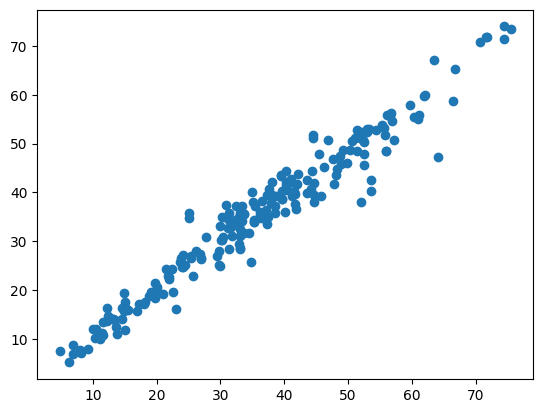

In [39]:
plt.scatter(y_test,y_pred1)

<Axes: xlabel='concrete_compressive_strength'>

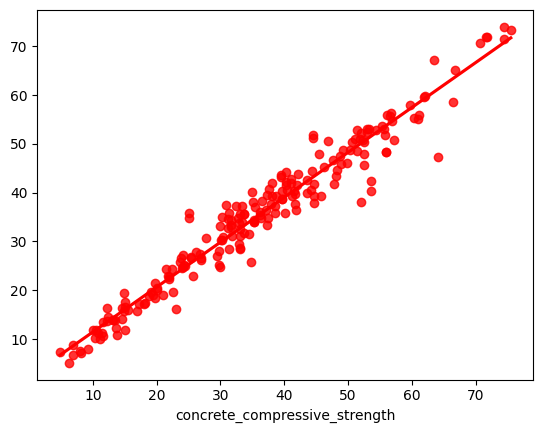

In [44]:
sns.regplot(x=y_test,y=y_pred1,ci = None,color='red')

In [45]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled  = scaler.transform(x_test)

In [46]:
clf = CatBoostRegressor()
clf.fit(x_train,y_train)
pred = clf.predict(x_test)
print(r2_score(y_test,pred))

Learning rate set to 0.03971
0:	learn: 16.4275817	total: 3.87ms	remaining: 3.86s
1:	learn: 16.0413929	total: 6.74ms	remaining: 3.36s
2:	learn: 15.6813422	total: 10.1ms	remaining: 3.35s
3:	learn: 15.2995401	total: 13.9ms	remaining: 3.45s
4:	learn: 14.9157256	total: 17.3ms	remaining: 3.45s
5:	learn: 14.5488652	total: 19.3ms	remaining: 3.2s
6:	learn: 14.2278488	total: 21.9ms	remaining: 3.11s
7:	learn: 13.9007085	total: 25.8ms	remaining: 3.19s
8:	learn: 13.6524517	total: 28.4ms	remaining: 3.12s
9:	learn: 13.3309101	total: 32ms	remaining: 3.16s
10:	learn: 13.0760004	total: 34.3ms	remaining: 3.08s
11:	learn: 12.8152029	total: 36.3ms	remaining: 2.99s
12:	learn: 12.5775986	total: 38.7ms	remaining: 2.94s
13:	learn: 12.3175077	total: 41.7ms	remaining: 2.94s
14:	learn: 12.0502486	total: 43.9ms	remaining: 2.88s
15:	learn: 11.8179799	total: 46.1ms	remaining: 2.84s
16:	learn: 11.5710865	total: 48.1ms	remaining: 2.78s
17:	learn: 11.3335720	total: 51.1ms	remaining: 2.79s
18:	learn: 11.1003076	total: 5

In [47]:
model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train_scaled,y_train)

    y_pred = model.predict(x_test_scaled)
    mae,rmse,r2_square = evaluate_model(y_test,y_pred)
    
    model_list.append(list(models.keys())[i])

    print("---------------------------------------------------------------------------")
    print(f"{list(models.keys())[i]}")
    print(f"Mean Absolute Error - {mae}")
    print(f"RMSE - {rmse}")
    print(f"Accuracy : {r2_square}")
    r2_list.append(r2_square)

    print("="*35)
    print('\n')

---------------------------------------------------------------------------
Linear Regressor
Mean Absolute Error - 7.746165964567805
RMSE - 9.85062243641871
Accuracy : 0.6234246666754888


---------------------------------------------------------------------------
Lasso
Mean Absolute Error - 8.698691089919778
RMSE - 10.628489253571946
Accuracy : 0.5616029753368768


---------------------------------------------------------------------------
Ridge
Mean Absolute Error - 7.753345000918347
RMSE - 9.852554358529925
Accuracy : 0.623276942903028


---------------------------------------------------------------------------
Decision Tree
Mean Absolute Error - 4.204854368932039
RMSE - 6.295087158260566
Accuracy : 0.8462100281516557


---------------------------------------------------------------------------
Adaboost
Mean Absolute Error - 6.257357476243305
RMSE - 7.5293936735495395
Accuracy : 0.7799889305893178


---------------------------------------------------------------------------
KNeighb

In [48]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['model','r2_score']).sort_values(by = ['r2_score'],ascending=False)

,model,r2_score
8,CatBoostRegressor,0.949602
9,RandomForestRegressor,0.896205
7,XGBRFRegressor,0.854132
3,Decision Tree,0.846210
4,Adaboost,0.779989
5,KNeighborsRegressor,0.697056
6,SVR,0.649923
0,Linear Regressor,0.623425
2,Ridge,0.623277
1,Lasso,0.561603


In [55]:
# test = [184,222.4,0.0,96.7,189.3,4.5,967.1,870.3,3,11.58] = 13.5161
test = [185,222.4,30.0,96.7,189.3,24.5,967.1,870.3,20] # actual 24.4 
clf.predict(test)

25.934819473299015

In [56]:
def model(test):
    pred = clf.predict(test)
    if pred <= 40 :
        print(f"Residential conrete \n value : {pred}")
    elif pred <= 60:
        print(f"Commercial conrete \n value : {pred}")
    else:
        print(f"High Strength conrete \n value : {pred}")

In [59]:
model([78,86.3,20.9,0.0,44.7,11.2,1004.6,83.7,91])

Residential conrete 
 value : 38.437681319761545
